In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("/home/countess/Documents/Studies/IX Semester/Mining/GetOldTweets-python/output_got.csv", sep=";",error_bad_lines=False)

b'Skipping line 1926: expected 10 fields, saw 12\nSkipping line 2998: expected 10 fields, saw 11\nSkipping line 5154: expected 10 fields, saw 11\nSkipping line 7511: expected 10 fields, saw 11\nSkipping line 10531: expected 10 fields, saw 11\nSkipping line 10658: expected 10 fields, saw 11\nSkipping line 11953: expected 10 fields, saw 11\nSkipping line 12597: expected 10 fields, saw 11\nSkipping line 12969: expected 10 fields, saw 11\nSkipping line 14775: expected 10 fields, saw 11\nSkipping line 15940: expected 10 fields, saw 11\nSkipping line 15999: expected 10 fields, saw 11\nSkipping line 16887: expected 10 fields, saw 11\nSkipping line 18595: expected 10 fields, saw 11\nSkipping line 19025: expected 10 fields, saw 11\nSkipping line 19288: expected 10 fields, saw 12\nSkipping line 21953: expected 10 fields, saw 11\nSkipping line 27653: expected 10 fields, saw 11\nSkipping line 32635: expected 10 fields, saw 11\nSkipping line 38693: expected 10 fields, saw 11\n'


In [20]:
import datetime
date_time_obj = datetime.datetime.strptime('2016-06-24 01:59', '%Y-%m-%d %H:%M')
date_time_obj

datetime.datetime(2016, 6, 24, 1, 59)

In [5]:
filtered = dataset.filter(items=['date', 'text'])

In [6]:
filtered['date'] = pd.to_datetime((filtered['date']))

In [7]:
tweets_20_21 = filtered.loc[filtered.date.between('2016-06-23 20', '2016-06-23 21')]['text']

In [8]:
tweets_21_22 = filtered.loc[filtered.date.between('2016-06-23 21', '2016-06-23 22')]['text']

In [9]:
tweets_22_23 = filtered.loc[filtered.date.between('2016-06-23 22', '2016-06-23 23')]['text']

In [10]:
tweets_23_00 = filtered.loc[filtered.date.between('2016-06-23 23', '2016-06-24 00')]['text']

In [24]:
tweets_00_01 = filtered.loc[filtered.date.between('2016-06-24 00', '2016-06-24 01')]['text']

In [27]:
tweets_01_02 = filtered.loc[filtered.date.between('2016-06-24 01', '2016-06-24 02')]['text']

In [180]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/aga/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [179]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [190]:
def count_sentiment(tweets):
    positive = 0
    negative = 0
    neutral = 0
    for tweet in tweets:
        if isinstance(tweet, float):
            break
        if nltk_sentiment(tweet)['compound'] > 0.05:
            positive += 1
        elif nltk_sentiment(tweet)['compound'] < 0.05:
            negative += 1
        else:
            neutral += 1
    return [positive, negative, neutral]

In [14]:
counts_20_21 = count_sentiment(tweets_20_21)

In [15]:
counts_21_22 = count_sentiment(tweets_21_22)

In [16]:
counts_22_23 = count_sentiment(tweets_22_23)

In [17]:
counts_23_00 = count_sentiment(tweets_23_00)

In [25]:
counts_00_01 = count_sentiment(tweets_00_01)

In [28]:
counts_01_02 = count_sentiment(tweets_01_02)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

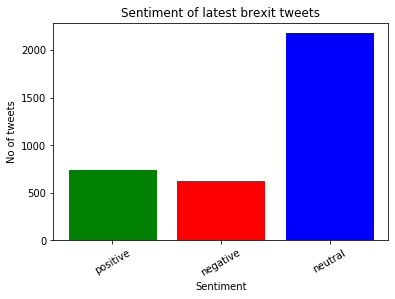

In [20]:
label = ['positive', 'negative', 'neutral']
index = np.arange(len(label))
def plot_bar_x(counts):
    # this is for plotting purpose
    index = np.arange(len(label))
    bar = plt.bar(index, counts)
    bar[0].set_color('g')
    bar[1].set_color('r')
    bar[2].set_color('b')
    plt.xlabel('Sentiment', fontsize=10)
    plt.ylabel('No of tweets', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Sentiment of latest brexit tweets')
    plt.show()

plot_bar_x(counts_20_21)

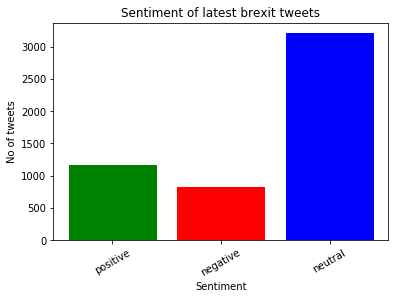

In [21]:
plot_bar_x(counts_21_22)

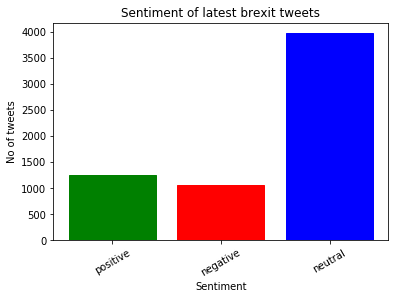

In [22]:
plot_bar_x(counts_22_23)

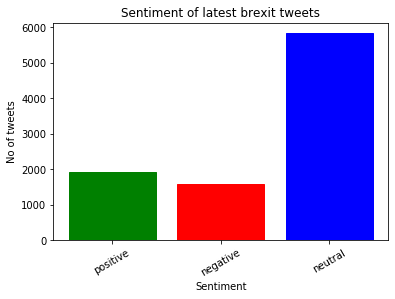

In [23]:
plot_bar_x(counts_23_00)

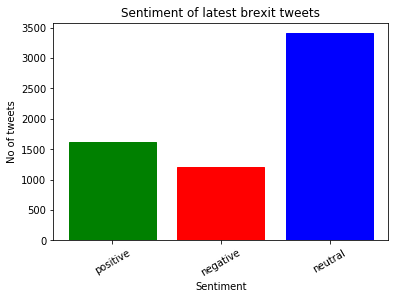

In [26]:
plot_bar_x(counts_00_01)

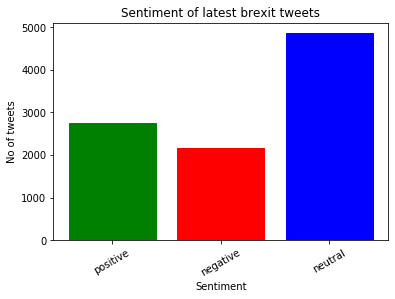

In [29]:
plot_bar_x(counts_01_02)

In [5]:
def calculate_percentage(tweets):
    no_of_tweets = tweets[0] + tweets[1] + tweets[2]
    positive_percentage = tweets[0]*100/no_of_tweets
    negative_percentage = tweets[1]*100/no_of_tweets
    neutral_percentage = tweets[2]*100/no_of_tweets
    return [positive_percentage, negative_percentage, neutral_percentage]

In [6]:
calculate_percentage([10,20,20])

[20.0, 40.0, 40.0]

In [4]:
dataset2019 = pd.read_csv("/home/aga/partition2/output_got.csv", sep=",",error_bad_lines=False)
filtered2019 = dataset2019.filter(items=['date', 'text'])
filtered2019['date'] = pd.to_datetime((filtered2019['date']))
print(filtered2019['date'])

0       2019-11-06 23:59:59
1       2019-11-06 23:59:57
2       2019-11-06 23:59:57
3       2019-11-06 23:59:56
4       2019-11-06 23:59:55
                ...        
60589   2019-11-06 00:00:03
60590   2019-11-06 00:00:02
60591   2019-11-06 00:00:01
60592   2019-11-06 00:00:00
60593   2019-11-06 00:00:00
Name: date, Length: 60594, dtype: datetime64[ns]


In [8]:
tweets_20_21 = filtered2019.loc[filtered2019.date.between('2019-11-06 20', '2019-11-06 21')]['text']
print(filtered2019)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 13', '2019-11-06 14')]['text']
sentiment_13_14 = count_sentiment(sentiment)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 14', '2019-11-06 15')]['text']
sentiment_14_15 = count_sentiment(sentiment)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 15', '2019-11-06 16')]['text']
sentiment_15_16 = count_sentiment(sentiment)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 16', '2019-11-06 17')]['text']
sentiment_16_17 = count_sentiment(sentiment)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 17', '2019-11-06 18')]['text']
sentiment_17_18 = count_sentiment(sentiment)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 19', '2019-11-06 20')]['text']
sentiment_19_20 = count_sentiment(sentiment)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 20', '2019-11-06 21')]['text']
sentiment_19_20 = count_sentiment(sentiment)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 21', '2019-11-06 22')]['text']
sentiment_21_22 = count_sentiment(sentiment)
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 22', '2019-11-06 23')]['text']
sentiment_22_23 = count_sentiment(sentiment)
print(sentiment_13_14)
print(sentiment_14_15)
print(sentiment_15_16)
print(sentiment_16_17)
print(sentiment_17_18)
print(sentiment_19_20)
print(sentiment_21_22)
print(sentiment_22_23)



                     date                                               text
0     2019-11-06 23:59:59  Yup. Emily Maitlis Is getting better and bette...
1     2019-11-06 23:59:57  Brexit is now 31st January 2020 : 85 days, 22 ...
2     2019-11-06 23:59:57  Depends if BREXIT is the only issue you're con...
3     2019-11-06 23:59:56  C'est quand le Brexit les gars? on veut plus v...
4     2019-11-06 23:59:55  EU says it did not amend Theresa May’s Brexit ...
...                   ...                                                ...
60589 2019-11-06 00:00:03  Whilst I respect your work on BNO residency fo...
60590 2019-11-06 00:00:02  86 days until Article 50 deadline #Article50 #...
60591 2019-11-06 00:00:01  Brexit betrayed 31 weeks, 4 days and 1 hour ago. 
60592 2019-11-06 00:00:00  "Will there REALLY be maggots in our orange ju...
60593 2019-11-06 00:00:00  Aftellen! Nog 2086 uur tot Brexit op 31 januar...

[60594 rows x 2 columns]
[89, 88, 32]
[92, 107, 65]
[459, 436, 207]
[249, 2

In [9]:
sentiment = filtered2019.loc[filtered2019.date.between('2019-11-06 10', '2019-11-06 23')]['text']
sentiment_22_23 = count_sentiment(sentiment)

In [10]:
print(sentiment_22_23)

[141, 127, 63]


In [47]:
tweets_20 = filtered2019.loc[filtered2019.date.between('2019-11-06 20', '2019-11-06 21')]['text']
print(tweets_20)


8945     Boris Johnson has distinguished himself as qui...
8946     El Fondo Monetario Europeo (FMI) advirtió de q...
8947     Promete @BorisJohnson concretar el #Brexit tra...
8948     Is this an oxymoron? ( Not Ian..) Fighting for...
8949     The partnership between #Hexham and it’s Germa...
                               ...                        
12807    Pleased to confirm Chris Farmer has now been a...
12808    Have you prepared an updated go-to-market stra...
12809    If Nigel Farage and the Brexit party try to co...
12810    WATCH 'David Dimbleby: How Brexit's Changed Br...
12811    Aftellen! Nog 2066 uur tot Brexit op 31 januar...
Name: text, Length: 3867, dtype: object


In [27]:
df = pd.read_csv("/home/aga/partition2/eksploracja_danych/brexit-data/borisjohnson.csv", sep=",",error_bad_lines=False)

# Analysis of Boris Johnson tweets

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

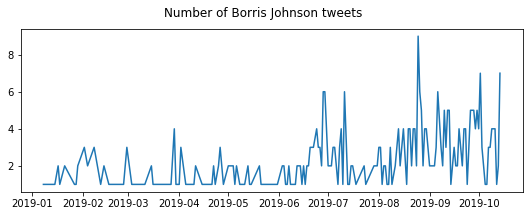

In [98]:
df = pd.read_csv("/home/aga/partition2/eksploracja_danych/brexit-data/borisjohnson.csv", sep=",",error_bad_lines=False)
def plot_count(start_date, end_date, df, title):
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df1 = df['date'].dt.date.value_counts().sort_index().reset_index()
    mask = (df1['index'] >= start_date) & (df1['index'] <= end_date)
    df2 = df1.loc[mask]
    df2.columns = ['DATE','Count']
    names = df2['DATE']
    values = df2['Count']
    plt.figure(figsize=(9, 3))
    plt.plot(names, values)
    plt.suptitle(title)
    plt.show()

plot_count('2019-01-01', '2019-10-14',df, 'Number of Borris Johnson tweets')

All Borris Johnson tweets

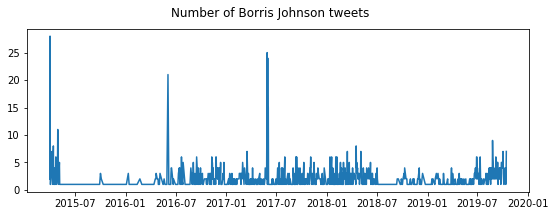

In [99]:
plot_count('2015-04-01', '2019-10-14',df, 'Number of Borris Johnson tweets')

Boris Johnson 2016 tweets

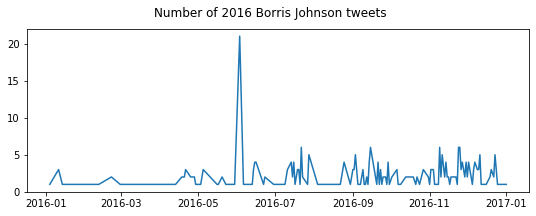

In [100]:
plot_count('2016-01-01', '2017-01-01',df, 'Number of 2016 Borris Johnson tweets')

Boris Johnson 2017 tweets

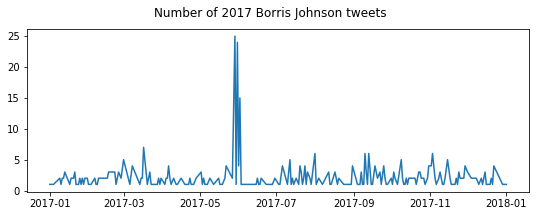

In [101]:
plot_count('2017-01-01', '2018-01-01',df, 'Number of 2017 Borris Johnson tweets')

Boris Johnson 2018 tweets

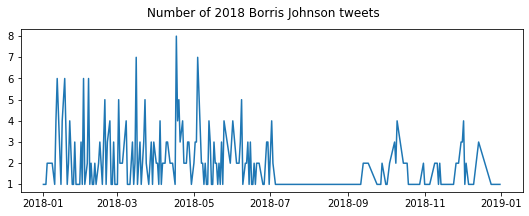

In [102]:
plot_count('2018-01-01', '2019-01-01',df, 'Number of 2018 Borris Johnson tweets')

Boris Johnson 2019 tweets

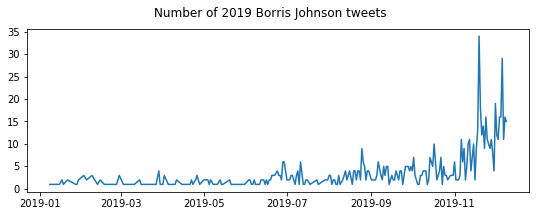

In [103]:
plot_count('2019-01-01', '2020-01-01',df, 'Number of 2019 Borris Johnson tweets')

In [123]:
def get_top_n_tweets(n, start_date, end_date):
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df1 = df['date'].dt.date.value_counts().sort_index().reset_index()
    mask = (df1['index'] >= start_date) & (df1['index'] <= end_date)
    df2 = df1.loc[mask]
    df2.columns = ['DATE','Count']
    df2 = df2.sort_values(['Count'], ascending = False)
    print(df2[:10])

Top 10 days with biggest number of tweets 2019

In [122]:
get_top_n_tweets(10, '2019-01-01', '2020-01-01')

           DATE  Count
846  2019-11-19     34
863  2019-12-06     29
858  2019-12-01     19
847  2019-11-20     18
865  2019-12-08     16
862  2019-12-05     16
861  2019-12-04     16
851  2019-11-24     16
866  2019-12-09     15
849  2019-11-22     14


Top 10 days with biggest number of tweets 2020

In [125]:
get_top_n_tweets(10, '2018-01-01', '2019-01-01')

           DATE  Count
513  2018-04-17      8
527  2018-05-04      7
489  2018-03-16      7
459  2018-02-06      6
456  2018-02-02      6
440  2018-01-12      6
443  2018-01-18      6
470  2018-02-19      5
495  2018-03-23      5
479  2018-03-02      5


In [126]:
get_top_n_tweets(10, '2017-01-01', '2018-01-01')

           DATE  Count
295  2017-05-29     25
297  2017-05-31     24
299  2017-06-02     15
254  2017-03-17      7
335  2017-08-01      6
396  2017-11-03      6
359  2017-09-13      6
356  2017-09-10      6
320  2017-07-12      5
248  2017-03-01      5


In [127]:
get_top_n_tweets(10, '2016-01-01', '2017-01-01')

           DATE  Count
95   2016-06-03     21
122  2016-07-22      6
187  2016-11-25      6
175  2016-11-09      6
143  2016-09-15      6
186  2016-11-24      6
200  2016-12-11      5
134  2016-09-03      5
125  2016-07-28      5
144  2016-09-16      5


In [165]:
def get_dates(start_date, end_date, df):
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df1 = df['date'].dt.date.value_counts().sort_index().reset_index()
    mask = (df1['index'] >= start_date) & (df1['index'] <= end_date)
    df2 = df1.loc[mask]
    df2.columns = ['DATE','Count']
    names = df2['DATE']
    return names

In [250]:
df = pd.read_csv("/home/aga/partition2/eksploracja_danych/brexit-data/borisjohnson.csv", sep=",",error_bad_lines=False)
# df = df[(df['date'] >= '2019-12-09 00:00:00') & (df['date'] <= '2019-12-09 23:59:59')]['text']
print(df)

                     date      username   to  replies  retweets  favorites  \
0     2019-12-09 16:44:00  BorisJohnson  NaN      462       306       1368   
1     2019-12-09 15:04:00  BorisJohnson  NaN      464       210        976   
2     2019-12-09 14:48:10  BorisJohnson  NaN      423      1108       5249   
3     2019-12-09 14:03:00  BorisJohnson  NaN      954      1096       5367   
4     2019-12-09 13:30:00  BorisJohnson  NaN      442       351       1621   
...                   ...           ...  ...      ...       ...        ...   
2284  2015-04-02 19:26:59  BorisJohnson  NaN       12       102         87   
2285  2015-04-02 19:18:22  BorisJohnson  NaN       35       212        141   
2286  2015-04-02 09:42:52  BorisJohnson  NaN       21        60         33   
2287  2015-04-01 21:13:21  BorisJohnson  NaN       55        84         83   
2288  2015-04-01 21:05:04  BorisJohnson  NaN      184       568        426   

                                                   text  geo me

In [168]:
get_dates('2019-01-01', '2020-01-01', df)

637    2019-01-08
638    2019-01-14
639    2019-01-15
640    2019-01-17
641    2019-01-18
          ...    
862    2019-12-05
863    2019-12-06
864    2019-12-07
865    2019-12-08
866    2019-12-09
Name: DATE, Length: 230, dtype: object

In [194]:
def count_sentiment_per_interval(start_date, end_date, df):
    dates = get_dates(start_date, end_date, df)
    positive_sentiment = []
    negative_sentiment = []
    for date in dates:
        start_date = str(date) + ' ' + '00:00:00'
        end_date = str(date) + ' ' + '23:59:59'
        df2 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]['text']
        sentiment = count_sentiment(df2)
        positive_sentiment.append(sentiment[0])
        negative_sentiment.append(sentiment[1])
    return [positive_sentiment, negative_sentiment, dates]


Plot sentiment of Boris Johnson tweets in 2019

In [251]:
sentiment = count_sentiment_per_interval('2019-01-01', '2020-01-01', df)
bj_2019_sentiment = sentiment

In [207]:
def plot_sentiment(sentiment_positive, sentiment_negative, labels, title='Sentiment plot'):
    plt.figure(figsize=(9, 3))
    plt.plot(labels, sentiment_positive, color='green')
    plt.plot(labels, sentiment_negative, color='red')
    plt.suptitle(title)
    plt.show()

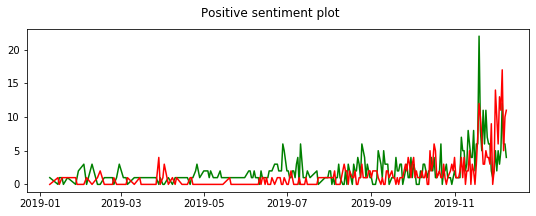

In [208]:
plot_sentiment(sentiment[0], sentiment[1] ,sentiment[2], 'Positive sentiment plot')

Plot sentiment of Boris Johnson tweets in November

In [240]:
bj_sentiment = count_sentiment_per_interval('2019-11-01', '2020-12-01', df)

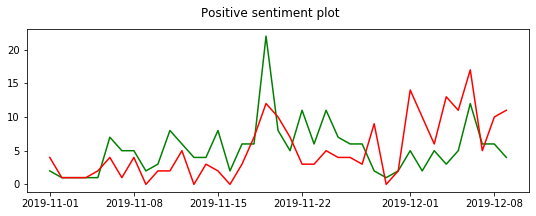

In [210]:
plot_sentiment(bj_sentiment[0], bj_sentiment[1] ,bj_sentiment[2], 'Positive sentiment plot')

# Analysis of conservatives party tweets

In [252]:
df = pd.read_csv("/home/aga/partition2/eksploracja_danych/brexit-data/conservatives.csv", sep=",",error_bad_lines=False)

All conservatives tweets

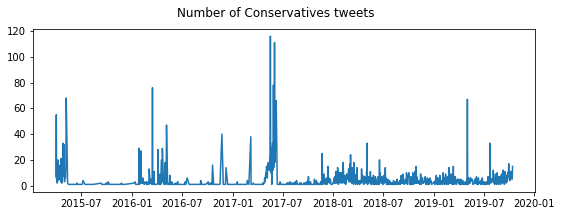

In [216]:
plot_count('2015-04-01', '2019-10-14',df, 'Number of Conservatives tweets')

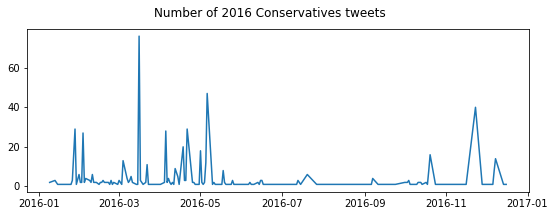

In [217]:
plot_count('2016-01-01', '2017-01-01',df, 'Number of 2016 Conservatives tweets')

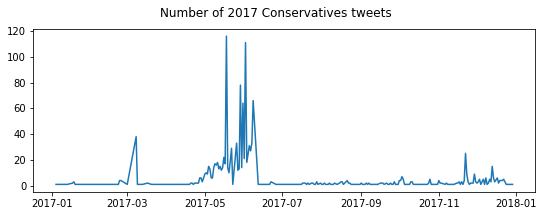

In [218]:
plot_count('2017-01-01', '2018-01-01',df, 'Number of 2017 Conservatives tweets')

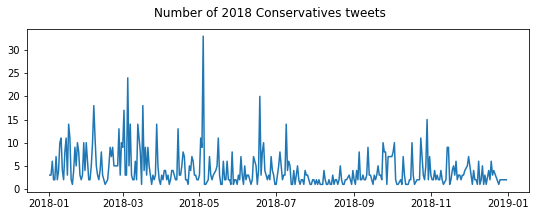

In [219]:
plot_count('2018-01-01', '2019-01-01',df, 'Number of 2018 Conservatives tweets')

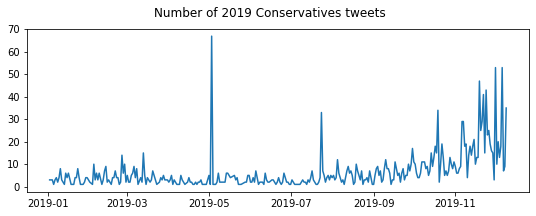

In [220]:
plot_count('2019-01-01', '2020-01-01',df, 'Number of 2019 Conservatives tweets')

Plot sentiment of Consevatives 2019 tweets

In [253]:
sentiment = count_sentiment_per_interval('2019-01-01', '2020-01-01', df)
cons_2019_sentiment = sentiment

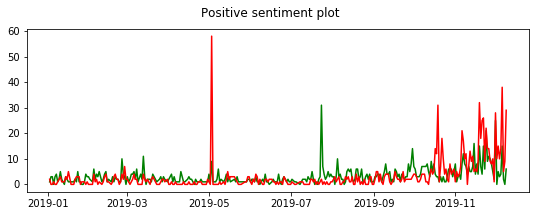

In [222]:
plot_sentiment(sentiment[0], sentiment[1] ,sentiment[2], 'Positive sentiment plot')

Plot sentiment of Conservatives tweets in November

In [242]:
cons_sentiment = count_sentiment_per_interval('2019-11-01', '2020-12-01', df)

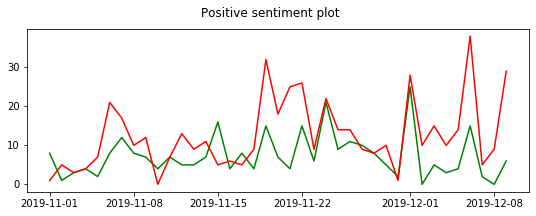

In [225]:
plot_sentiment(cons_sentiment[0], cons_sentiment[1] ,cons_sentiment[2], 'Positive sentiment plot')

In [270]:
import numpy as np
from dtw import dtw
def calculate_dtw(x, y):
    print(x)
    print(y)
    x = np.array(x)
    y = np.array(y)
    euclidean_norm = lambda x, y: np.abs(x - y)
    d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)
    print(d)
    return d

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Calculate dtw between october conservatives and boris tweets positive sentiment

In [271]:
bj_sentiment[0] = movingaverage(bj_sentiment[0], 3)
cons_sentiment[0] = movingaverage(cons_sentiment[0], 3)
calculate_dtw(bj_sentiment[0], cons_sentiment[0])

[ 1.33333333  1.          3.          4.33333333  5.66666667  4.
  3.33333333  4.33333333  5.66666667  6.          4.66666667  5.33333333
  4.66666667  5.33333333  4.66666667 11.33333333 12.         11.66666667
  8.          7.33333333  9.33333333  8.          8.          6.33333333
  4.66666667  3.          1.66666667  2.66666667  3.          4.
  3.33333333  4.33333333  6.66666667  7.66666667  8.          5.33333333]
[ 4.          2.66666667  3.          4.66666667  7.33333333  9.33333333
  9.          6.33333333  6.          5.33333333  5.66666667  5.66666667
  9.33333333  9.          9.33333333  5.33333333  9.          8.66666667
  8.66666667  8.66666667  8.33333333 14.         12.         13.66666667
 10.          9.66666667  7.66666667  5.         10.66666667  9.
 10.          2.66666667  4.          7.33333333  7.          5.66666667
  2.66666667]
0.9041095890410958


0.9041095890410958

In [247]:
calculate_dtw(bj_sentiment[1], cons_sentiment[1])

[4, 1, 1, 2, 4, 1, 4, 0, 2, 2, 5, 0, 3, 2, 0, 3, 7, 12, 10, 7, 3, 3, 5, 4, 4, 3, 9, 0, 2, 14, 10, 6, 13, 11, 17, 5, 10, 11]
[1, 5, 3, 4, 7, 21, 17, 10, 12, 0, 7, 13, 9, 11, 5, 6, 5, 9, 32, 18, 25, 26, 9, 22, 14, 14, 9, 8, 10, 1, 28, 10, 15, 10, 14, 38, 5, 9, 29]
2.7142857142857144


2.7142857142857144

Calculate DTW 2019 positive sentiment between Boris Johnson Tweets and Conservatives tweets

In [276]:
bj_2019_sentiment[0] = movingaverage(bj_2019_sentiment[0], 5)
cons_2019_sentiment[0] = movingaverage(cons_2019_sentiment[0], 5)
calculate_dtw(bj_2019_sentiment[0], cons_2019_sentiment[0])

[0.7        0.83333333 1.05       1.26666667 1.41666667 1.43333333
 1.31666667 1.11666667 0.9        0.78333333 0.78333333 0.9
 1.03333333 1.15       1.16666667 1.1        1.         0.91666667
 0.88333333 0.88333333 0.9        0.86666667 0.78333333 0.66666667
 0.55       0.46666667 0.43333333 0.46666667 0.55       0.66666667
 0.76666667 0.83333333 0.85       0.85       0.9        1.01666667
 1.21666667 1.45       1.66666667 1.8        1.85       1.81666667
 1.73333333 1.61666667 1.5        1.4        1.31666667 1.26666667
 1.23333333 1.2        1.15       1.1        1.05       1.03333333
 1.06666667 1.15       1.25       1.35       1.41666667 1.43333333
 1.38333333 1.3        1.2        1.11666667 1.06666667 1.05
 1.05       1.06666667 1.11666667 1.2        1.35       1.56666667
 1.83333333 2.08333333 2.26666667 2.41666667 2.58333333 2.8
 3.05       3.23333333 3.23333333 3.         2.6        2.15
 1.81666667 1.7        1.76666667 1.98333333 2.21666667 2.41666667
 2.48333333 2.4166666

0.3743902439024389

Calculate DTW 2019 negative sentiment between Boris Johnson Tweets and Conservatives tweets

In [257]:
calculate_dtw(bj_2019_sentiment[1], cons_2019_sentiment[1])

[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 4, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 3, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 3, 2, 4, 3, 1, 3, 4, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 5, 2, 3, 6, 5, 1, 2, 1, 1, 3, 1, 0, 1, 2, 3, 2, 4, 1, 1, 2, 4, 1, 4, 0, 2, 2, 5, 0, 3, 2, 0, 3, 7, 12, 10, 7, 3, 3, 5, 4, 4, 3, 9, 0, 2, 14, 10, 6, 13, 11, 17, 5, 10, 11]
[2, 0, 0, 1, 0, 0, 1, 2, 3, 1, 1, 1, 3, 2, 5, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 1, 0, 0, 0, 4, 1, 2, 0, 1, 0, 1, 3, 4, 1, 1, 0, 1, 3, 4, 2, 2, 0, 1, 4, 2, 7, 2, 2, 1, 0, 1, 2, 4, 2, 2, 0, 0, 0, 4, 2, 1, 2, 1, 0, 2, 3, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

0.7985480943738656